## Exploring Weather Trends
#### by Adaobi Onyeakagbu


The general idea of this project is to analyze local and global temperature data and compare the temperature trends where you live to overall global temperature trends.

### 1. Extracting the data
The first step is to extract the data from the database using SQL queries. 
Knowing that the columns that were available in the city_list table, I ran the query which gave me the countries available (to check if my country was on the list).

<img src = "img/sql1.jpg">

Then I ran the query to show the list of German cities available in the table.

<img src= "img/sql2.jpg">

Since the closest city to me is Hamburg, I ran a query on the city_data table to extract the year and average temperature for the city of Hamburg in Germany.
Then I exported this data to CSV file format.

<img src= "img/sql3.jpg">

Next I ran the query to extract the year and average temperature from the global_data table

<img src= "img/sql4.jpg">

### 2. Data Preprocessing and Analysis
Since I am more comfortable in Python, I preferred to use this tool to analyse the CSV than Excel or Google sheets. I imported the csv files into a dataframe using PANDAS library and since there were some missing unavailable data, i used the fillna function to turn them to zeros.

In [42]:
import numpy as np
import pandas as pd

df= pd.read_csv('/Users/adaobitether/Documents/UdacityDA/city_data.csv')
city = pd.DataFrame(df).fillna(0)

data= pd.read_csv('/Users/adaobitether/Documents/UdacityDA/global_data.csv')
globaldf= pd.DataFrame(data).fillna(0)

In [51]:
temptrends = pd.merge(city, globaldf, on='year')
#city.shape
#globaldf.shape
temptrends.head()

,year,avg_temp_x,avg_temp_y
0,1750,9.31,8.72
1,1751,8.94,7.98
2,1752,4.65,5.78
3,1753,8.12,8.39
4,1754,7.88,8.47


I first visualized the average temperatures of Hamburg and the world in a line chart, using matplotlib, a Python library for plotting graphs and charts, to see how the temperatures have varied over the past 250+ years.

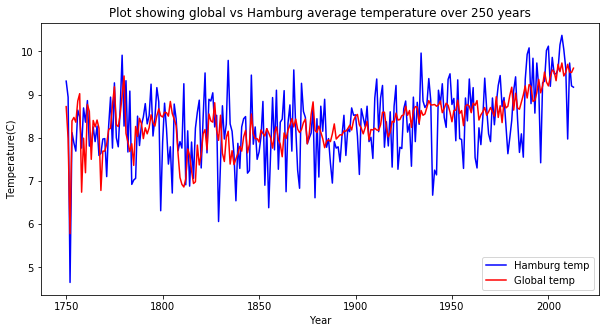

In [59]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,5))
plt.plot(temptrends.year, temptrends.avg_temp_x, 'b-', label='Hamburg temp')
plt.plot(temptrends.year, temptrends.avg_temp_y, 'r-', label='Global temp')
plt.xlabel('Year')
plt.ylabel('Temperature(C)')
plt.title('Plot showing global vs Hamburg average temperature over 250 years')

plt.legend(loc='lower right')
plt.show()

From the line chart above, it can be seen that the large variations over the past 250+ years cannot allow us infer anything from the data. So to see a smoother trend over a period, we use the Moving Average. The Simple Moving Average formula is a very basic arithmetic mean over the number of periods. I have made use of a 10 year moving average in this case over a 5-year or 20-year period because it adequately smoothes out the graph without losing critical data.

In [90]:
temptrends['MA_Hamburg']=temptrends['avg_temp_x'].rolling(10).mean()
temptrends['MA_Global']=temptrends['avg_temp_y'].rolling(10).mean()
temptrends.head(15)

,year,avg_temp_x,avg_temp_y,MA_Hamburg,MA_Global,temp_diff
0,1750,9.31,8.72,NaN,NaN,NaN
1,1751,8.94,7.98,NaN,NaN,NaN
2,1752,4.65,5.78,NaN,NaN,NaN
3,1753,8.12,8.39,NaN,NaN,NaN
4,1754,7.88,8.47,NaN,NaN,NaN
5,1755,7.69,8.36,NaN,NaN,NaN
6,1756,8.64,8.85,NaN,NaN,NaN
7,1757,8.48,9.02,NaN,NaN,NaN
8,1758,7.76,6.74,NaN,NaN,NaN
9,1759,8.69,7.99,8.016,8.030,-0.014


Finally, I used a line chart to then visualise the trend using the 10-year moving averages of the Hamburg and Global data. 

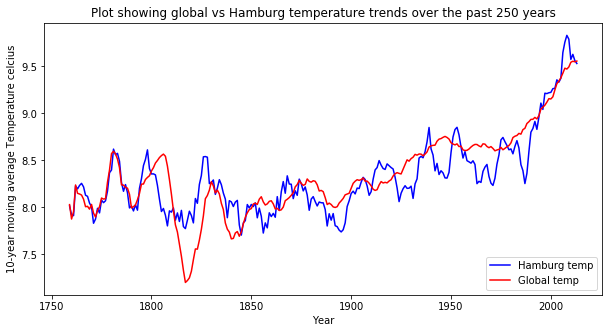

In [58]:
plt.figure(figsize=(10,5))
plt.plot(temptrends.year, temptrends.MA_Hamburg, 'b-', label='Hamburg temp')
plt.plot(temptrends.year, temptrends.MA_Global, 'r-', label='Global temp')
plt.xlabel('Year')
plt.ylabel('10-year moving average Temperature celcius')
plt.title('Plot showing global vs Hamburg temperature trends over the past 250 years')

plt.legend(loc='lower right')
plt.show()

### Observations
1. From the chart, it is easy to observe a steady rise in average temperatures both regionally and Globally. The numerical values can also be gotten for this: 

In [91]:
globaldf['avg_temp'].iloc[-1]-globaldf['avg_temp'].iloc[0]

1.1099999999999994

In [92]:
city['avg_temp'].iloc[-1]-city['avg_temp'].iloc[0]

2.9399999999999995

There has been a 1.1 degree rise in average temperature globally and a 2.9 degree (C) rise in temperature in Hamburg, since the temperature readings began (Mid 1700s).

2. From the chart, it is easy to observe that fluctuations in Hamburg's temperature had a steady effect on the global temperatures in earlier times. Between 1800 and 1850, there was a mirrored drop in Hamburg's temperature which is mirrored by the global temperature, to further prove this. 
    * Therefore one can say that there must have been a similar dip in other regional temperatures, resulting in a drop in a large drop in global temperature. 
    * However, these temperature trends stopped mirroring each other from around 1900. It becomes hard to see a correlation between the fluctuations in Hamburg's local temperature and the fluctuations in Global temperature. Global temperature seems to follow a steady rising pattern.

3. The temperature difference between Hamburg and the world has changed over time. To visualize this more clearly, I have created a temperature difference chart below:

Text(0.5, 1.0, 'Plot showing global vs Hamburg temperature difference over the past 250 years')

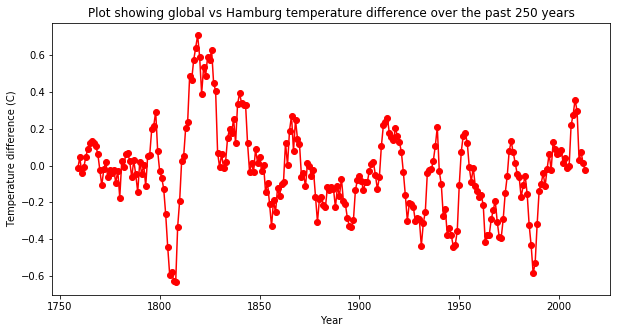

In [94]:
temptrends['temp_diff']=temptrends['MA_Hamburg']- temptrends['MA_Global']
#temptrends.head(15)
plt.figure(figsize=(10,5))
plt.plot(temptrends.year, temptrends.temp_diff, 'r-o')
plt.xlabel('Year')
plt.ylabel('Temperature difference (C)')
plt.title('Plot showing global vs Hamburg temperature difference over the past 250 years')

* Between 1750s and 1800, the temperature difference stayed very close to 0, with little deviation. However as time went by, Hamburg became either much warmer or much colder.
* The average temperature difference between Hamburg and the world is minimal at -0.026 degrees celcius, with a standard deviation of 0.23 (as shown below).

In [85]:
temptrends.describe()

,year,avg_temp_x,avg_temp_y,MA_Hamburg,MA_Global,temp_diff
count,264.000000,264.000000,264.000000,255.000000,255.000000,255.000000
mean,1881.500000,8.328902,8.359394,8.317514,8.344286,-0.026773
std,76.354437,0.845307,0.575184,0.413786,0.440769,0.235041
min,1750.000000,4.650000,5.780000,7.706000,7.203000,-0.636000
25%,1815.750000,7.790000,8.077500,8.031500,8.053000,-0.164500
50%,1881.500000,8.320000,8.365000,8.243000,8.274000,-0.028000
75%,1947.250000,8.890000,8.700000,8.488000,8.636500,0.087500
max,2013.000000,10.370000,9.730000,9.829000,9.556000,0.708000


4. There is a noticeably steep rise in temperature from the end of the 20th century to the 2000s in both Hamburg and the world which indicates a large increase in global warming events in this era.